In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('C:/Users/Peter/ELECTRO PI INTERNSHIP/TASK 2/Employees Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [6]:
df.select_dtypes(include=['object']).dtypes

Attrition         object
BusinessTravel    object
Department        object
EducationField    object
Gender            object
JobRole           object
MaritalStatus     object
Over18            object
OverTime          object
dtype: object

In [7]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [8]:
df['Attrition'] = df['Attrition'].factorize(['No','Yes'])[0]
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


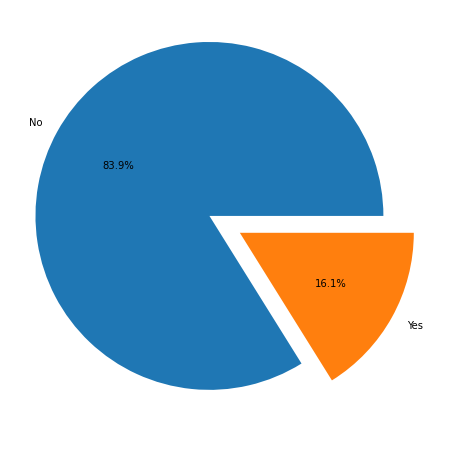

In [9]:
plt.figure(figsize=(8,8))
pie = df.groupby('Attrition')['Attrition'].count()
plt.pie(pie, explode=[0.1, 0.1], labels=['No', 'Yes'], autopct='%1.1f%%');

In [10]:
df.select_dtypes(include=['int64']).dtypes

Age                         int64
DailyRate                   int64
DistanceFromHome            int64
Education                   int64
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobSatisfaction             int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object

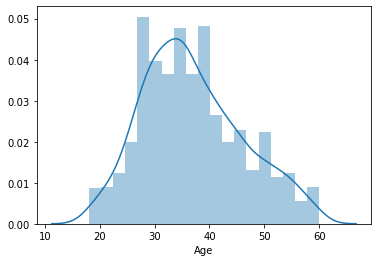

In [11]:
sns.distplot(df["Age"])

In [12]:
df['Age'].value_counts(ascending=False)

35    78
34    77
31    69
36    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
46    33
44    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
48    19
51    19
53    19
52    18
54    18
22    16
56    14
58    14
23    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64

In [13]:
df['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

In [14]:
df['EmployeeCount'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

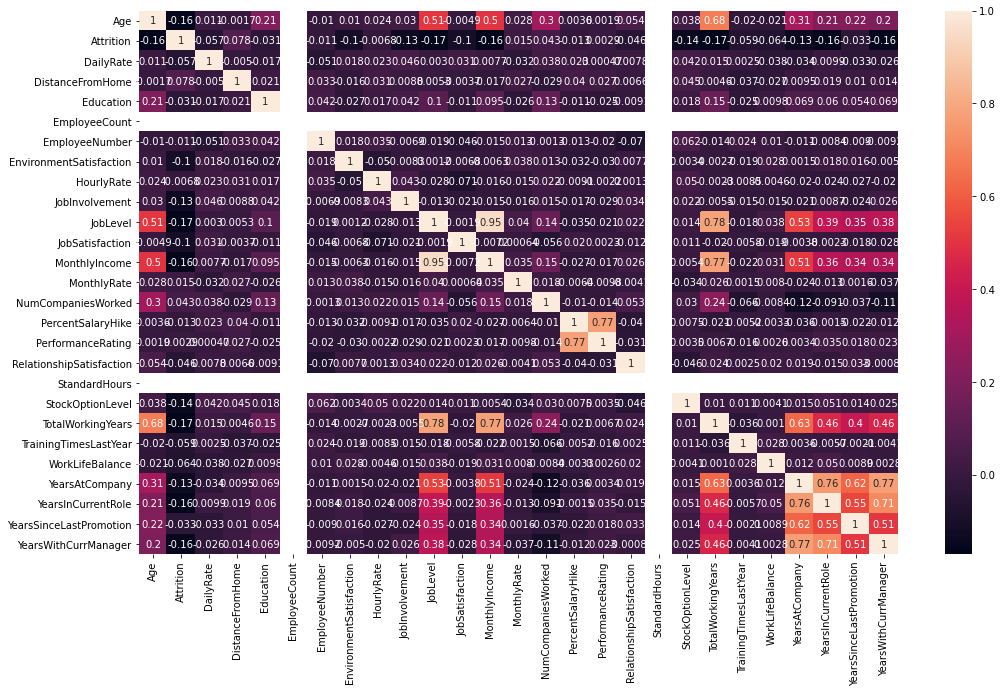

In [15]:
plt.figure(figsize=(17,10))
sns.heatmap( df.corr() , annot =True )

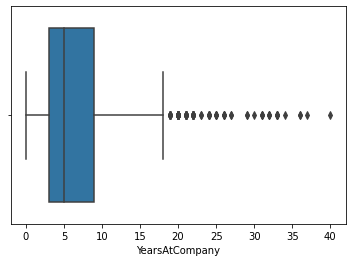

In [16]:
sns.boxplot(df["YearsAtCompany"])

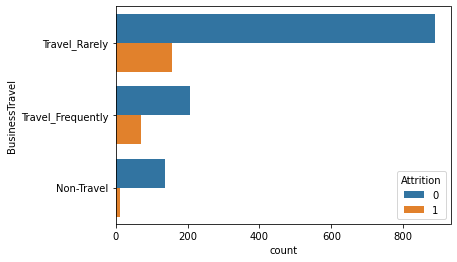

In [17]:
sns.countplot(y='BusinessTravel', hue='Attrition', data=df);

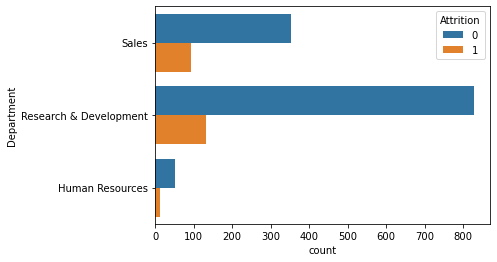

In [18]:
sns.countplot(y='Department', hue='Attrition', data=df)

In [19]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

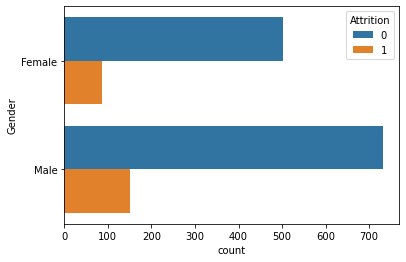

In [20]:
sns.countplot(y='Gender', hue='Attrition', data=df);

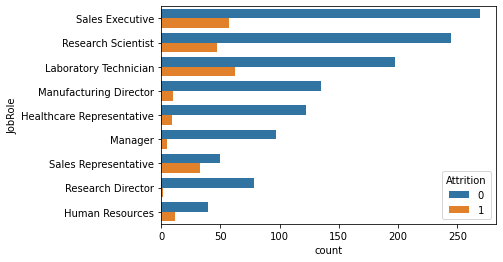

In [21]:
sns.countplot(y='JobRole', hue='Attrition', data=df)

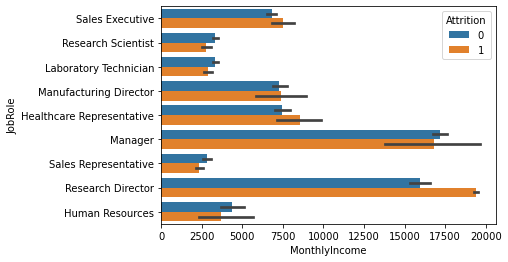

In [22]:
sns.barplot(y='JobRole', x='MonthlyIncome', hue='Attrition', data=df)

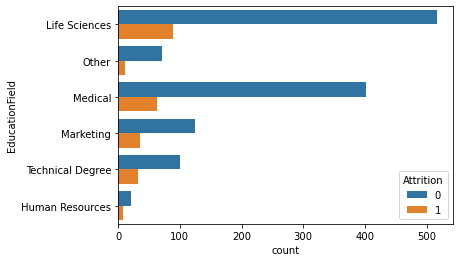

In [23]:
sns.countplot(y='EducationField', hue='Attrition', data=df)

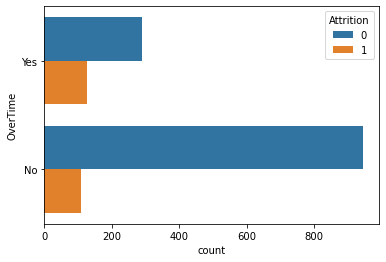

In [24]:
sns.countplot(y='OverTime', hue='Attrition', data=df)

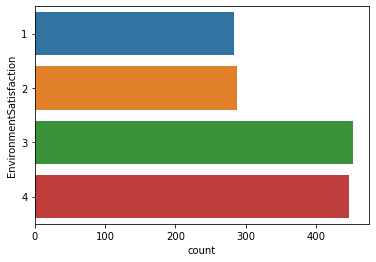

In [25]:
sns.countplot(y='EnvironmentSatisfaction', data=df)

In [26]:
X = df.drop(['Attrition','BusinessTravel','EducationField','OverTime'],axis=1) 
y = df['Attrition']

In [27]:
X['Department'] = preprocessing.LabelEncoder().fit_transform(X['Department'])
X['Education'] = preprocessing.LabelEncoder().fit_transform(X['Education'])
X['JobRole'] = preprocessing.LabelEncoder().fit_transform(X['JobRole'])
X['Gender'] = preprocessing.LabelEncoder().fit_transform(X['Gender'])
X['MaritalStatus'] = preprocessing.LabelEncoder().fit_transform(X['MaritalStatus'])
X['Over18'] = preprocessing.LabelEncoder().fit_transform(X['Over18'])

In [28]:
Scaler = StandardScaler()
X = Scaler.fit_transform(X)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)

In [30]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(1470, 31)
(1176, 31)
(294, 31)


In [31]:
models = [] 
models.append(("Random Forest", RandomForestClassifier()))
models.append(("Logistic Regression", LogisticRegression(solver='liblinear')))
models.append(("SVM", svm.SVC(kernel='linear')))

n_folds = 5
results = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=n_folds)
    print("Testing model:", name)
    
   
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring="f1_weighted", verbose=0, n_jobs=-1)
    
    
    model.fit(X_train,y_train)
    
  
    train_pred = model.predict(X_train)
    Training_score = accuracy_score(train_pred,y_train)
    test_pred = model.predict(X_test)
    Test_score = accuracy_score(test_pred,y_test)
    
    results.append(cv_results)
    
    msg = f"Cross_Val Mean: {cv_results.mean()}, Training Accuracy: {Training_score}, Testing Accuracy: {Test_score}"
    print(msg + "\n")

Testing model: Random Forest
Cross_Val Mean: 0.8057080538367414, Training Accuracy: 1.0, Testing Accuracy: 0.8503401360544217

Testing model: Logistic Regression
Cross_Val Mean: 0.8219775205615518, Training Accuracy: 0.8656462585034014, Testing Accuracy: 0.8571428571428571

Testing model: SVM
Cross_Val Mean: 0.7660141990060427, Training Accuracy: 0.8392857142857143, Testing Accuracy: 0.8367346938775511

